In [1]:
import  pandas as pd
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [2]:
#获取数据
satis=pd.read_csv(r'E:\Users\Boeing\Desktop\kesci project\训练集.csv')

# 更改列名

In [3]:
col = ['id','上次评分','项目数量','平均月工时','工龄','工伤','福利等级','五年内有升职','部门','工资水平','满意度']
name = {i:j for i,j in zip(satis.columns,col)}
data = satis.rename(columns=name)

In [4]:
data.head()

,id,上次评分,项目数量,平均月工时,工龄,工伤,福利等级,五年内有升职,部门,工资水平,满意度
0,13697,0.99,3,161.39,2,0,a,0,accounting,medium,0.681
1,1142,1.00,5,226.22,6,0,b,0,marketing,low,0.876
2,7954,0.91,5,199.45,2,0,e,0,sales,medium,0.955
3,2225,0.51,3,235.14,3,0,c,0,sales,low,0.817
4,9753,0.89,3,219.91,2,0,a,0,technical,low,0.920


In [5]:
data[['福利等级','工资水平']] = OrdinalEncoder().fit_transform(data[['福利等级','工资水平']])
data.head()

,id,上次评分,项目数量,平均月工时,工龄,工伤,福利等级,五年内有升职,部门,工资水平,满意度
0,13697,0.99,3,161.39,2,0,0.0,0,accounting,2.0,0.681
1,1142,1.00,5,226.22,6,0,1.0,0,marketing,1.0,0.876
2,7954,0.91,5,199.45,2,0,4.0,0,sales,2.0,0.955
3,2225,0.51,3,235.14,3,0,2.0,0,sales,1.0,0.817
4,9753,0.89,3,219.91,2,0,0.0,0,technical,1.0,0.920


In [47]:
data1 = pd.get_dummies(data['部门'], columns=(data['部门'].values))
data_new = pd.concat([data,data1],axis = 1)
data_new.drop(columns=['部门'])

,id,上次评分,项目数量,平均月工时,工龄,工伤,福利等级,五年内有升职,工资水平,满意度,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,13697,0.99,3,161.39,2,0,0.0,0,2.0,0.681,0,0,1,0,0,0,0,0,0,0
1,1142,1.00,5,226.22,6,0,1.0,0,1.0,0.876,0,0,0,0,0,1,0,0,0,0
2,7954,0.91,5,199.45,2,0,4.0,0,2.0,0.955,0,0,0,0,0,0,0,1,0,0
3,2225,0.51,3,235.14,3,0,2.0,0,1.0,0.817,0,0,0,0,0,0,0,1,0,0
4,9753,0.89,3,219.91,2,0,0.0,0,1.0,0.920,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,11971,0.89,4,150.45,3,0,4.0,0,0.0,0.849,0,0,1,0,0,0,0,0,0,0
11995,14966,0.81,5,221.28,5,0,1.0,0,1.0,0.836,0,0,0,0,0,0,0,1,0,0
11996,7491,0.60,4,136.36,4,1,2.0,0,2.0,0.915,0,0,0,0,0,0,0,1,0,0
11997,12680,0.84,6,268.54,4,0,1.0,0,1.0,0.099,1,0,0,0,0,0,0,0,0,0


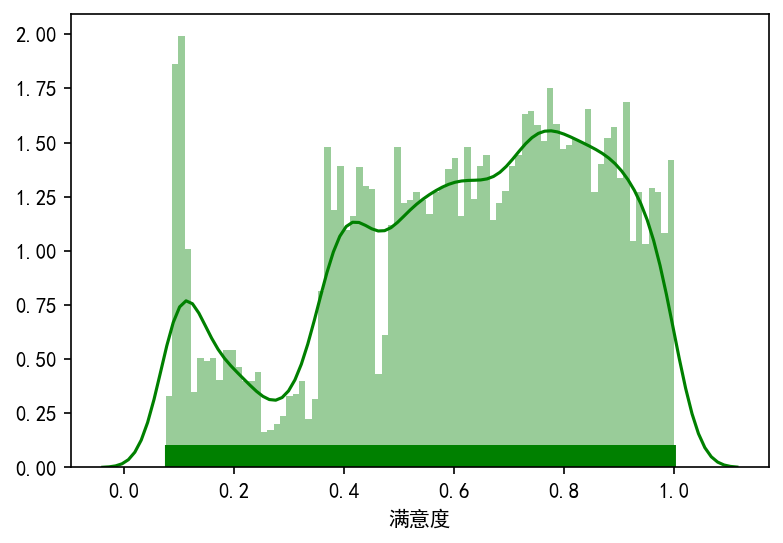

In [36]:

sns.distplot(data.满意度,bins=80,rug=True,color='g')

# 缺失值探索

In [27]:
data.isnull().all()

id        False
上次评分      False
项目数量      False
平均月工时     False
工龄        False
工伤        False
福利等级      False
五年内有升职    False
部门        False
工资水平      False
满意度       False
dtype: bool

# 相关性探索：

In [33]:
data.corr('pearson').满意度    #各项数据与满意度之间的关系系数    


id        0.049497
上次评分      0.103578
项目数量     -0.140529
平均月工时    -0.022989
工龄       -0.102777
工伤        0.059632
五年内有升职    0.025748
满意度       1.000000
Name: 满意度, dtype: float64

In [32]:
data.corr('spearman').满意度 

id        0.045551
上次评分      0.159371
项目数量      0.008109
平均月工时     0.057633
工龄       -0.139476
工伤        0.057319
五年内有升职    0.022142
满意度       1.000000
Name: 满意度, dtype: float64

# 数据可视化：

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 上次评分分布

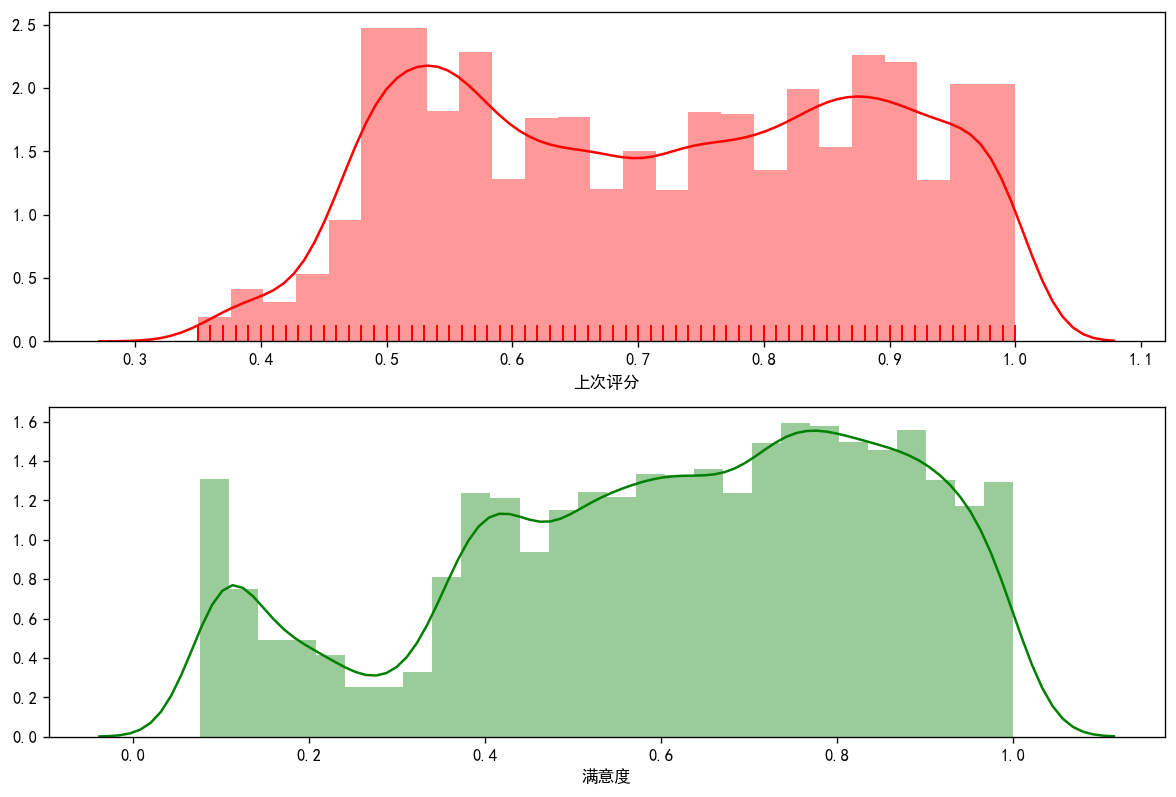

In [12]:
plt.figure(figsize=(12, 8))
plt.rcParams['figure.dpi'] = 150
plt.subplot(211)
sns.distplot(data.上次评分, hist=True, rug=True,kde=True,color='r')
plt.subplot(212)
sns.distplot(data.满意度, hist=True, rug=False,kde=True,color='g')

# 项目数量

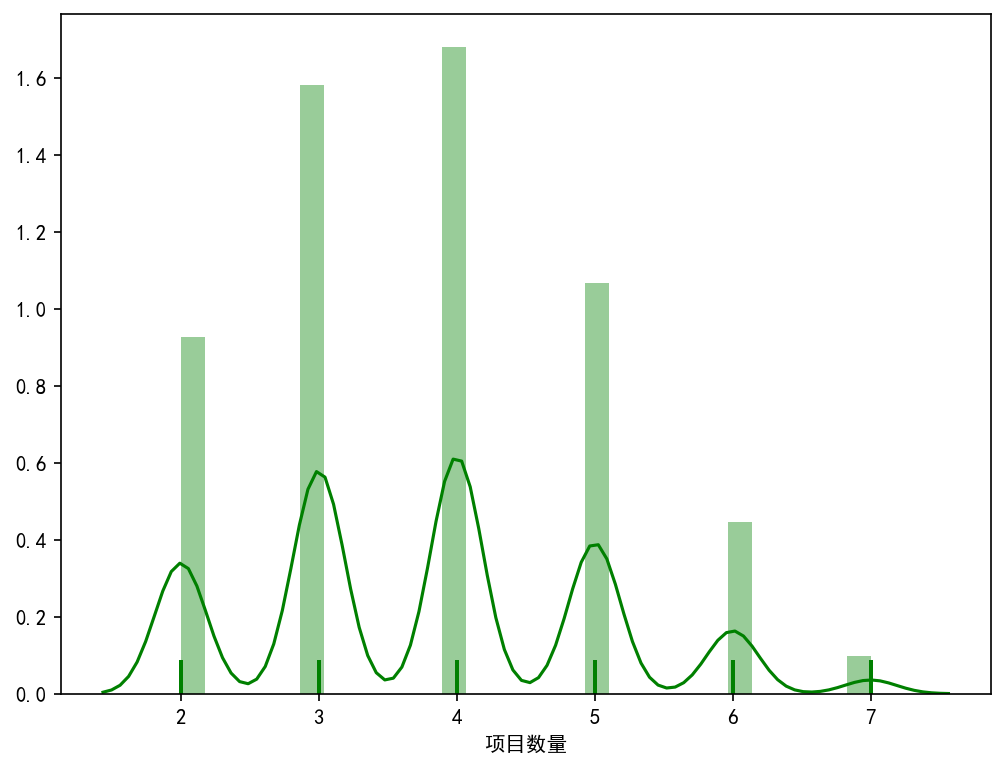

In [16]:
plt.figure(figsize=(8, 6))
plt.rcParams['figure.dpi'] = 150
sns.distplot(data.项目数量, hist=True, rug=True,kde=True,color='g')
#sns.jointplot(x = data.项目数量.value_counts().index,y=data.项目数量.value_counts(),kind='kde')

# 平均月工时

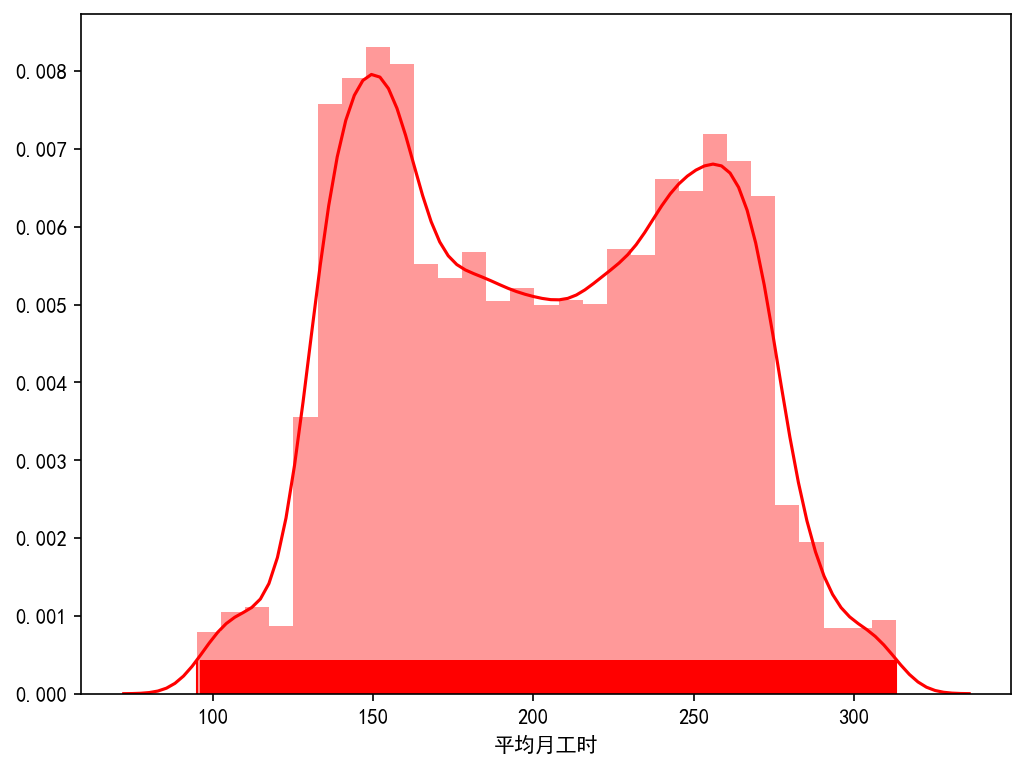

In [18]:
plt.figure(figsize=(8, 6))
plt.rcParams['figure.dpi'] = 150
sns.distplot(data.平均月工时, hist=True, rug=True,kde=True,color='r')

# 工龄

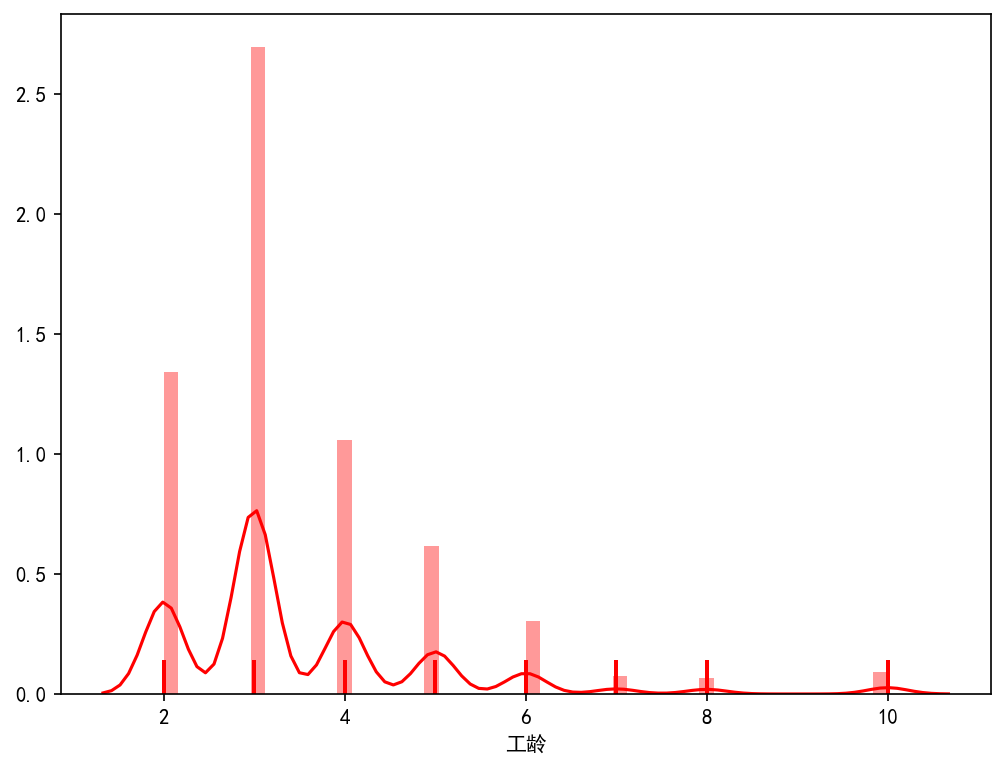

<Figure size 1200x900 with 0 Axes>

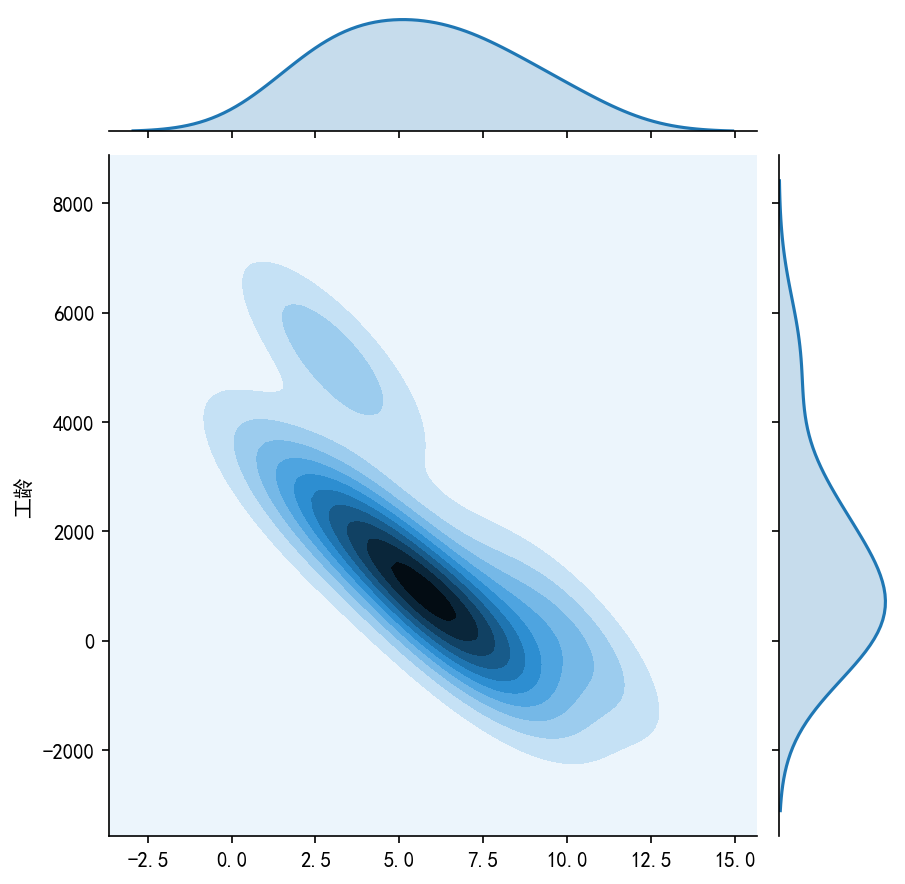

In [20]:
plt.figure(figsize=(8, 6))
plt.rcParams['figure.dpi'] = 150
sns.distplot(data.工龄, hist=True, rug=True,kde=True,color='r')
plt.figure(figsize=(8, 6))
sns.jointplot(x = data.工龄.value_counts().index,y=data.工龄.value_counts(),kind='kde')

# 福利等级

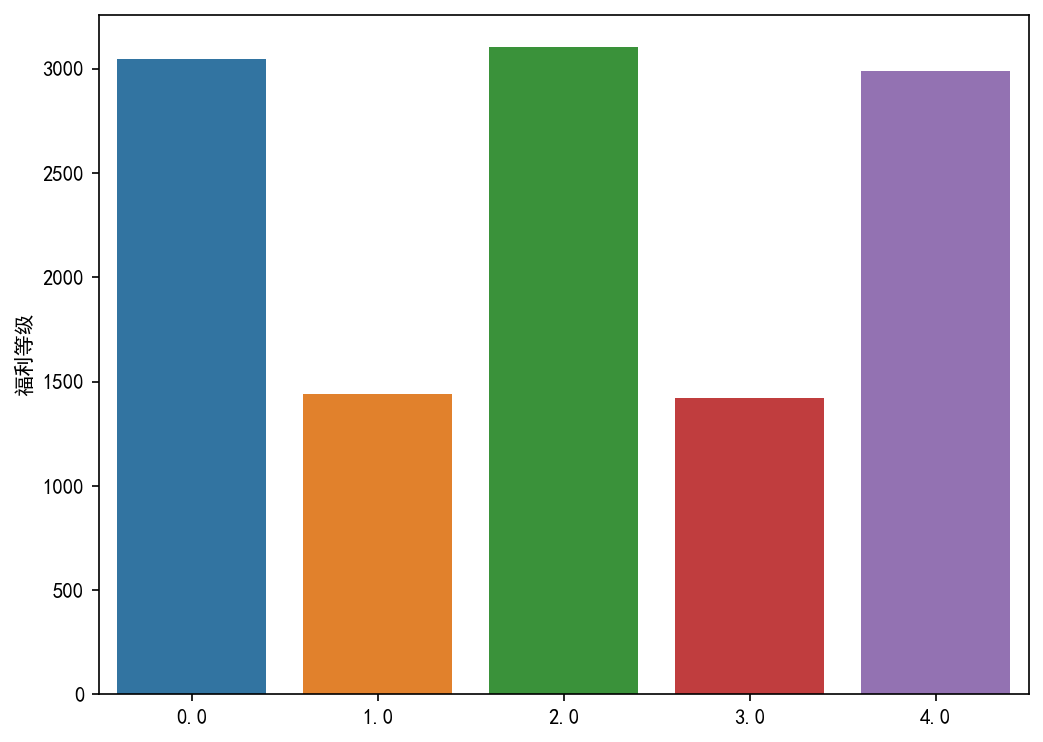

In [21]:
plt.figure(figsize=(8, 6))
plt.rcParams['figure.dpi'] = 150
sns.barplot(x = data.福利等级.value_counts().index,y=data.福利等级.value_counts())

# 部门

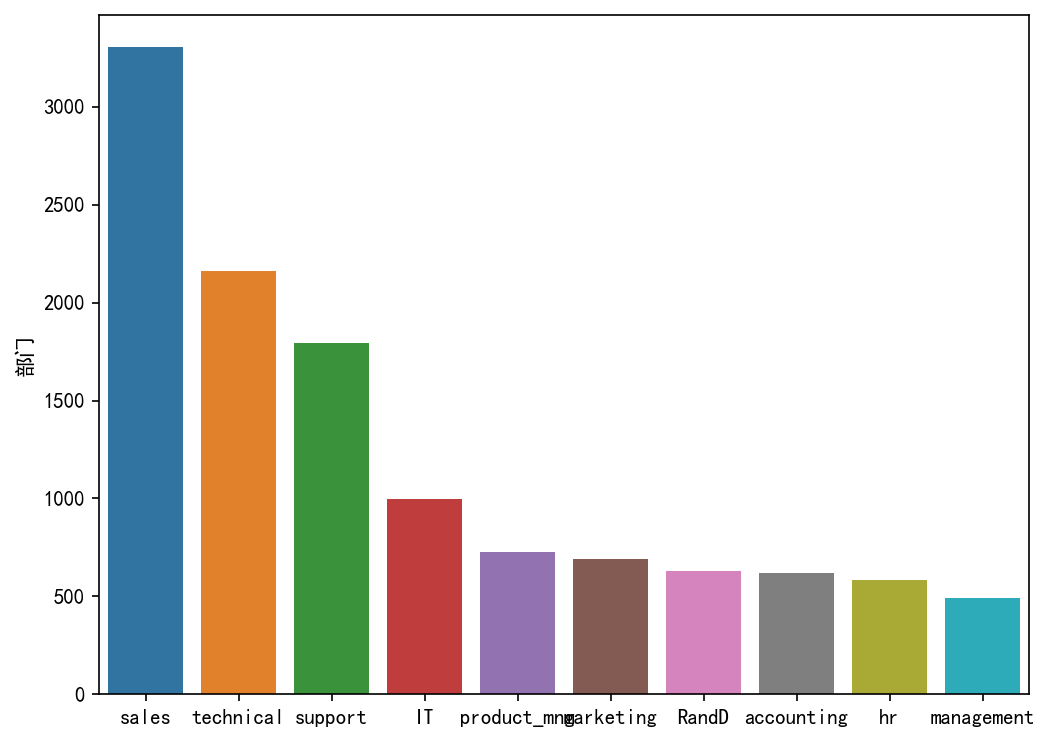

In [22]:
plt.figure(figsize=(8, 6))
plt.rcParams['figure.dpi'] = 150
sns.barplot(x = data.部门.value_counts().index,y=data.部门.value_counts())

# 工资水平

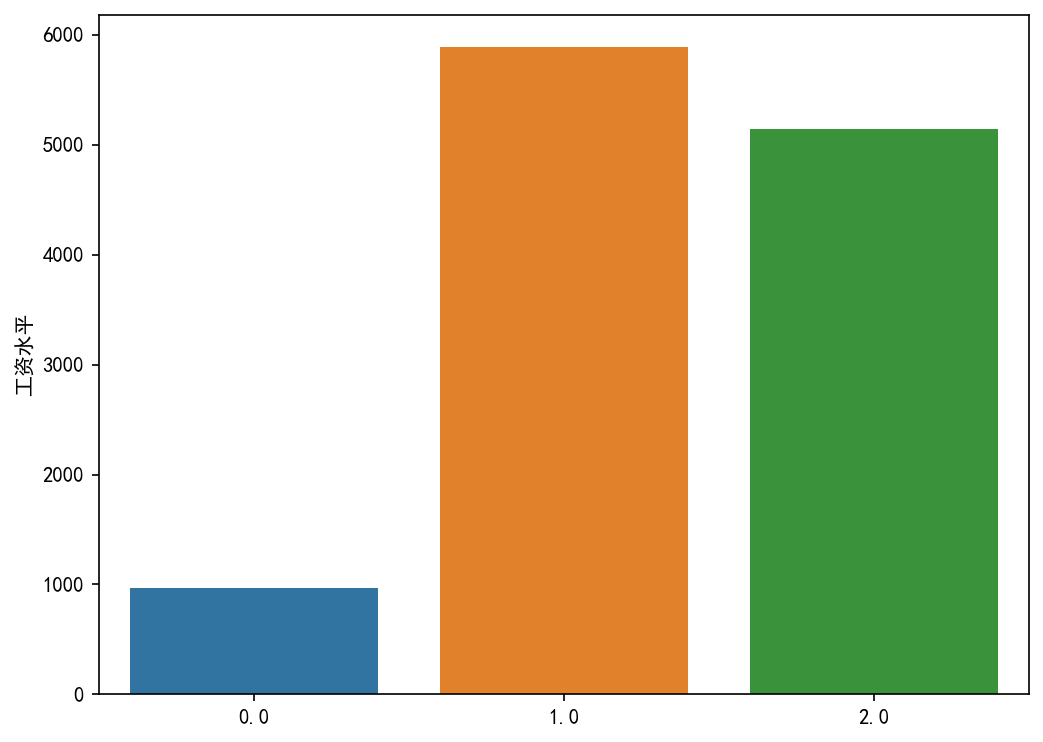

In [23]:
plt.figure(figsize=(8, 6))
plt.rcParams['figure.dpi'] = 150
sns.barplot(x = data.工资水平.value_counts().index,y=data.工资水平.value_counts())
#for each in data.工资水平.value_counts().index:
#plt.text(low,data.工资水平.value_counts()['low']+500,'gx')

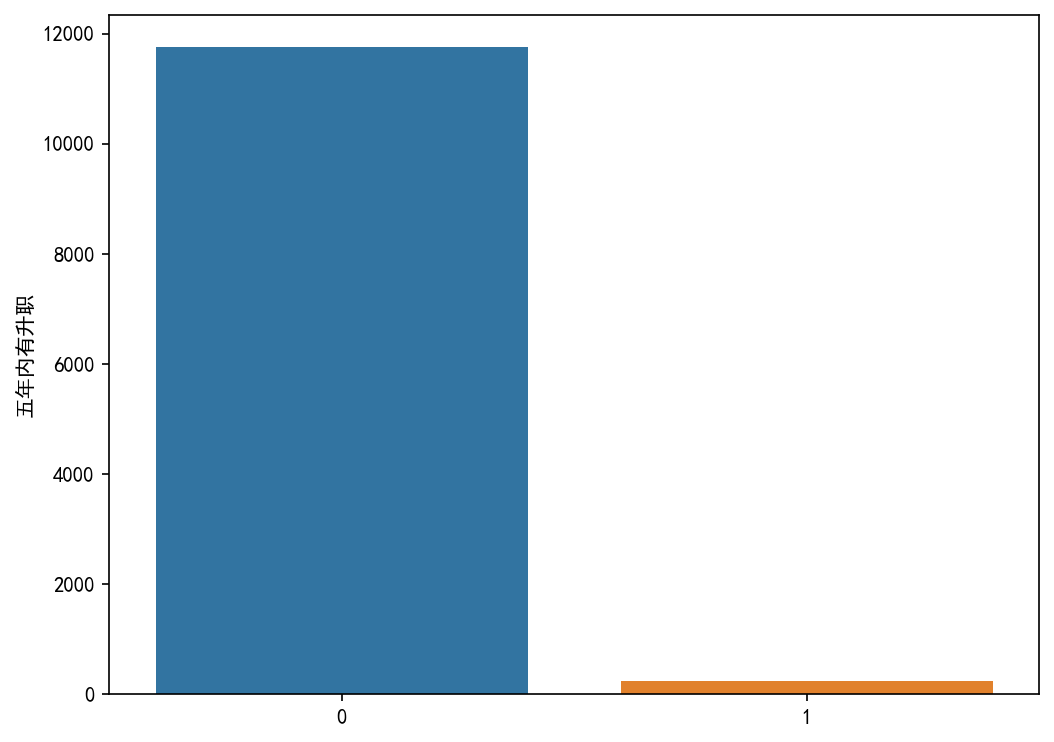

In [24]:
plt.figure(figsize=(8, 6))
plt.rcParams['figure.dpi'] = 150
sns.barplot(x = data.五年内有升职.value_counts().index,y=data.五年内有升职.value_counts())

# 整体线性相关探索:

<Figure size 1440x1080 with 0 Axes>

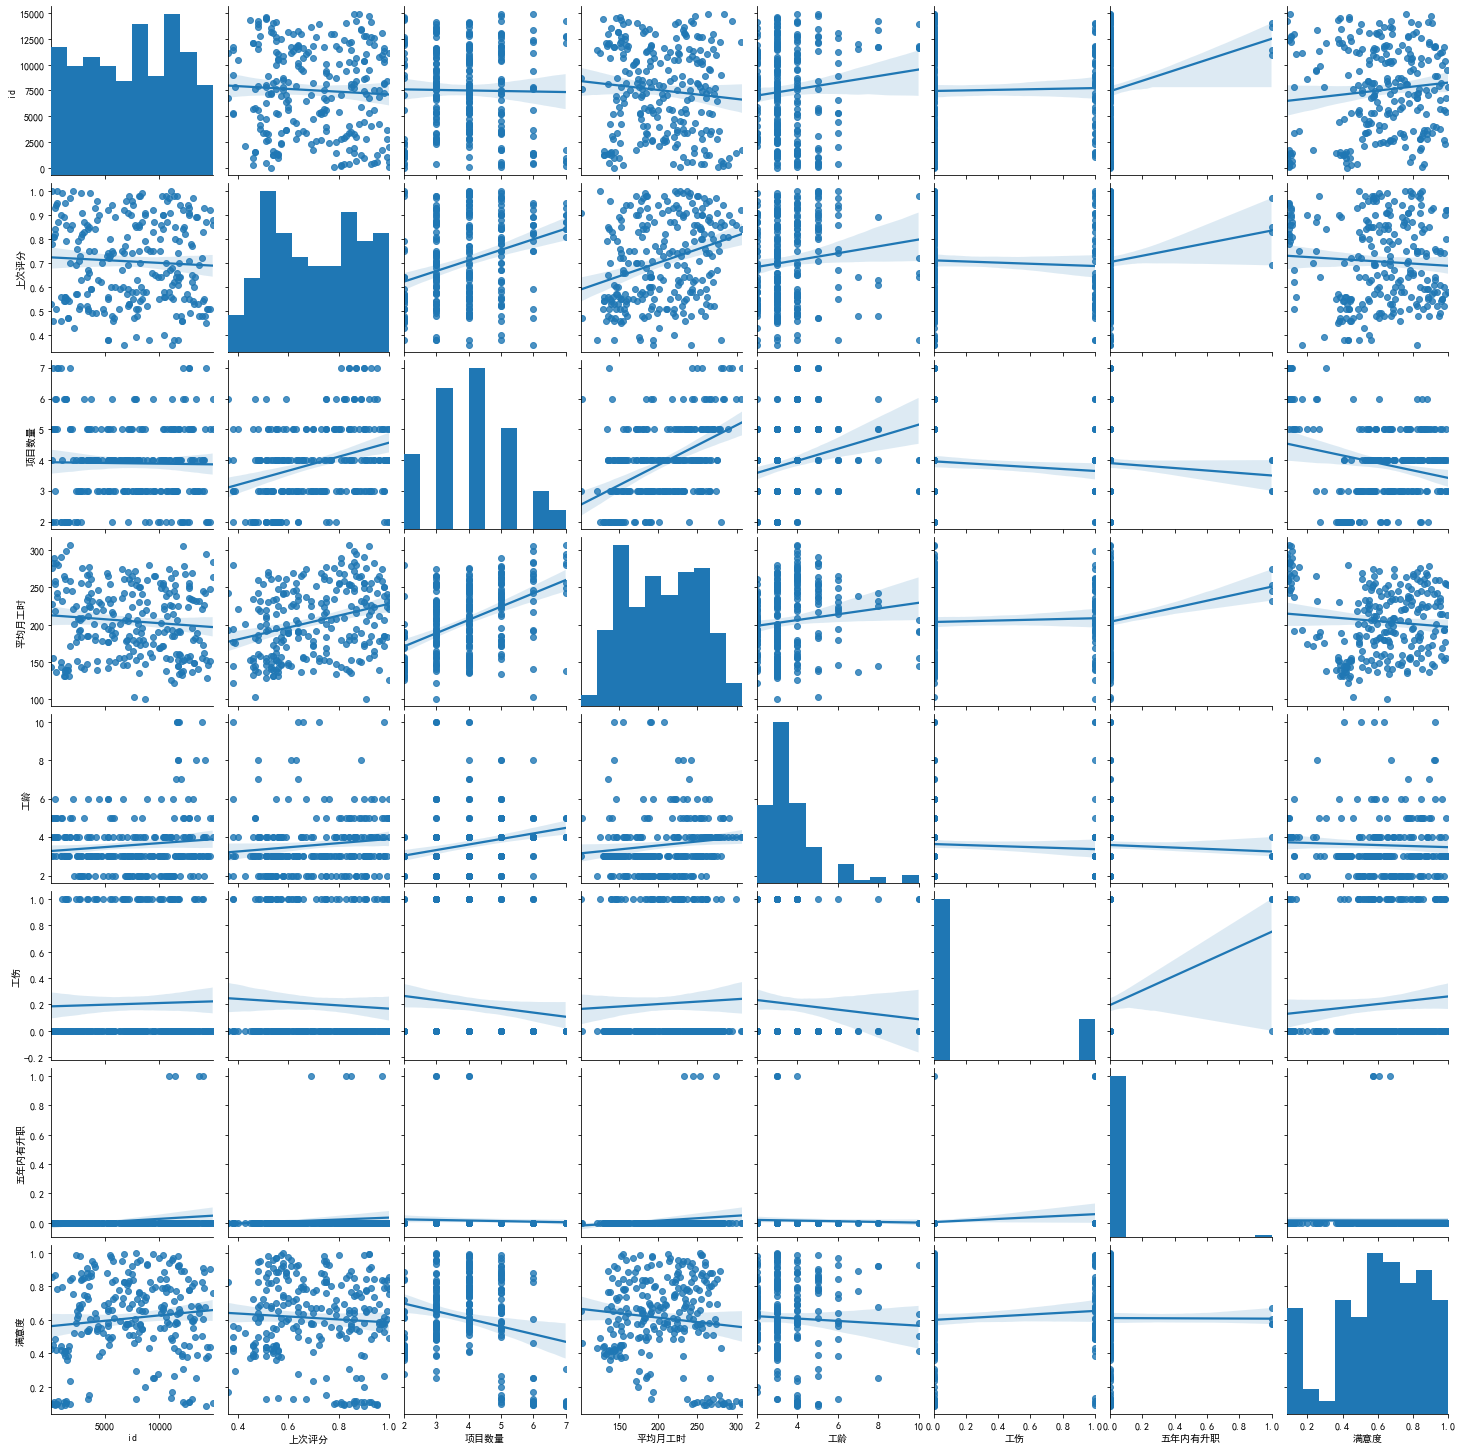

In [107]:
plt.figure(figsize=(20, 15))
sns.pairplot(data.iloc[2000:2250],kind="reg")    #kind：用于控制非对角线上的图的类型，可选"scatter"与"reg"

# 相关性程度热力图：

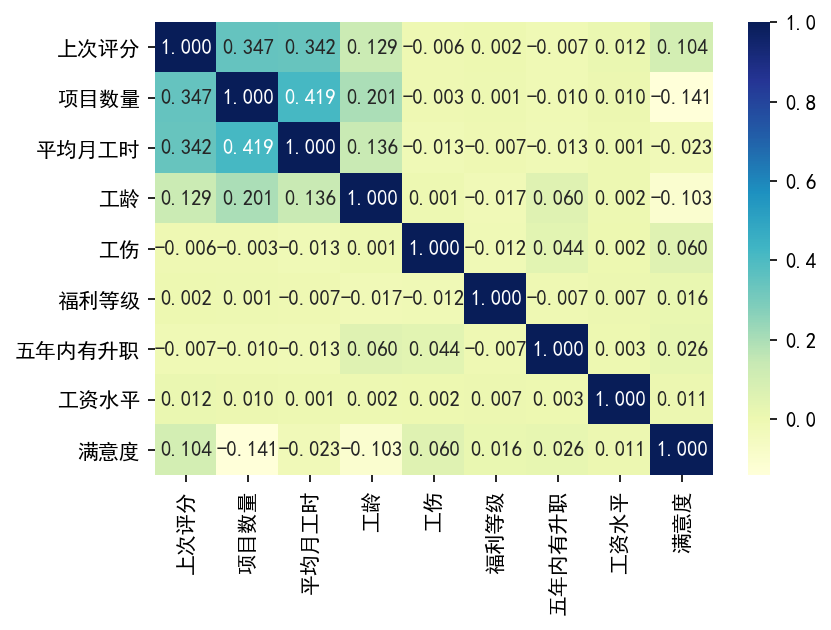

In [32]:

sns.heatmap(data[['上次评分','项目数量','平均月工时','工龄','工伤','福利等级','五年内有升职','工资水平','满意度']].corr('pearson'), annot=True, cmap="YlGnBu",fmt=".3f")


# 以不同分类标准查看分布:

<Figure size 1200x900 with 0 Axes>

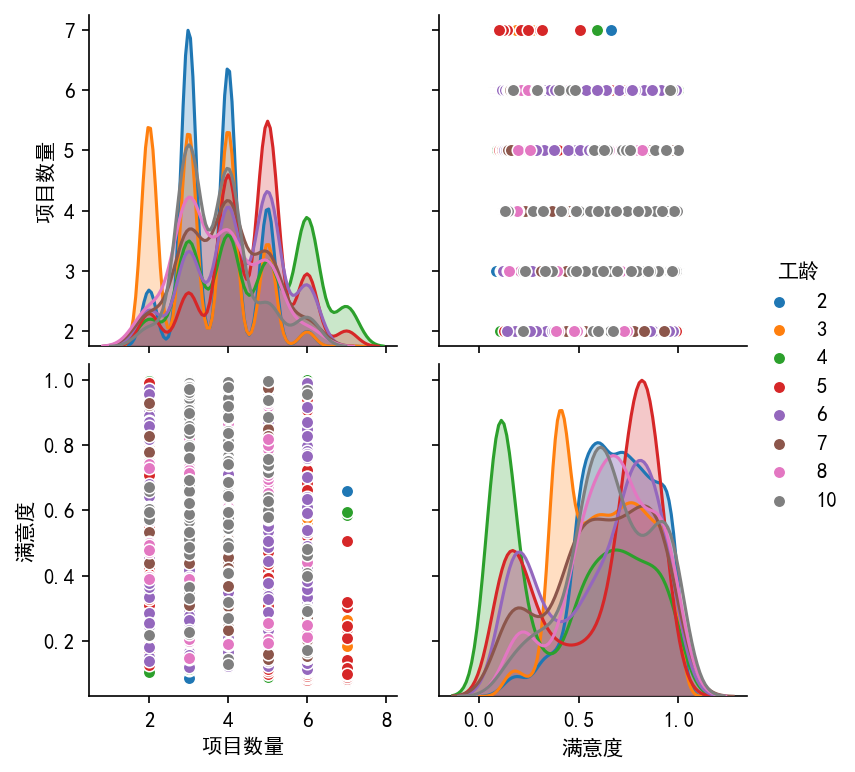

In [25]:
#plt.rcParams['savefig.dpi'] = 120 #图片像素
#plt.rcParams['figure.dpi'] = 120 #分辨率
plt.figure(figsize=(8, 6))
plt.rcParams['figure.dpi'] = 150
sns.pairplot(data[['工龄','项目数量','满意度']],hue='工龄')

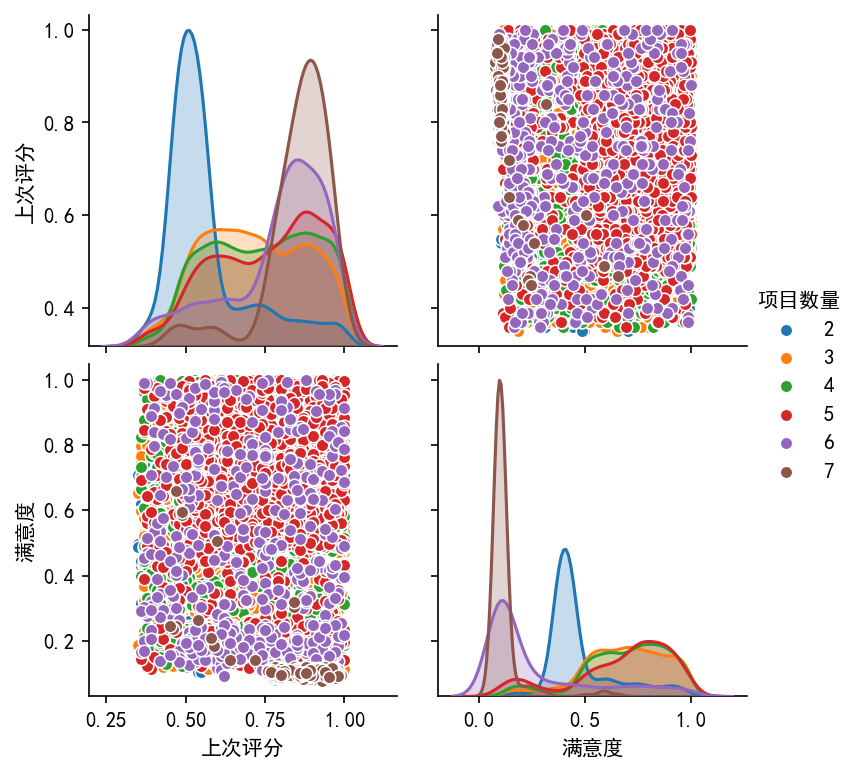

In [26]:
sns.pairplot(data[['上次评分','项目数量','满意度']],hue='项目数量')

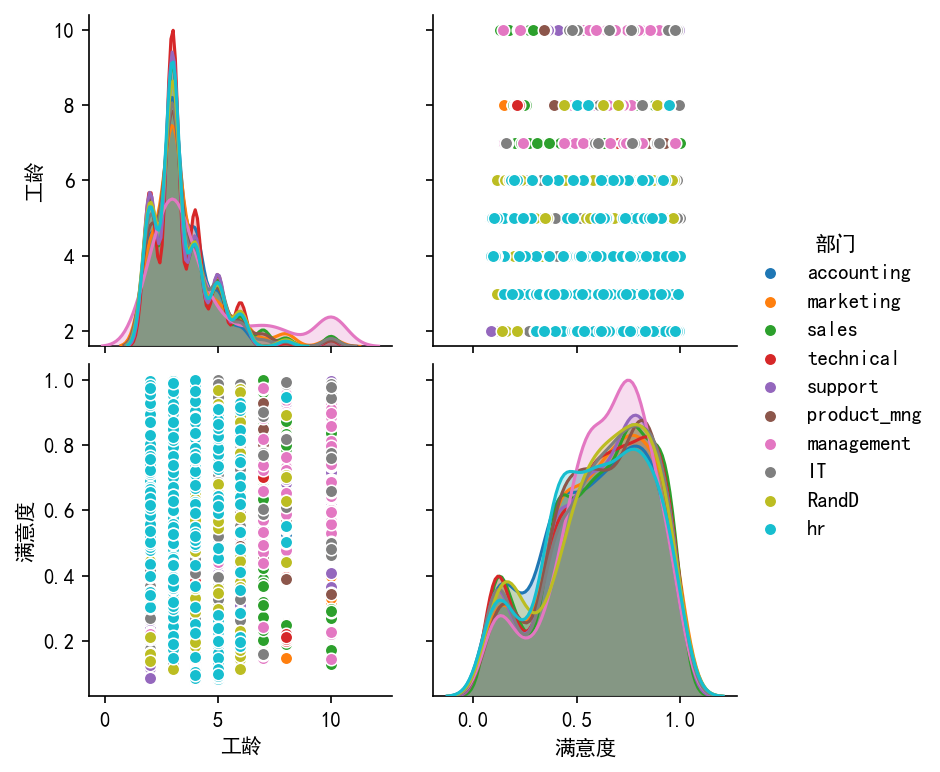

In [27]:

sns.pairplot(data[['部门','工龄','满意度']],hue='部门')
#plt.savefig(r'C:\Users\Boeing\Desktop\test.png', dpi=400)

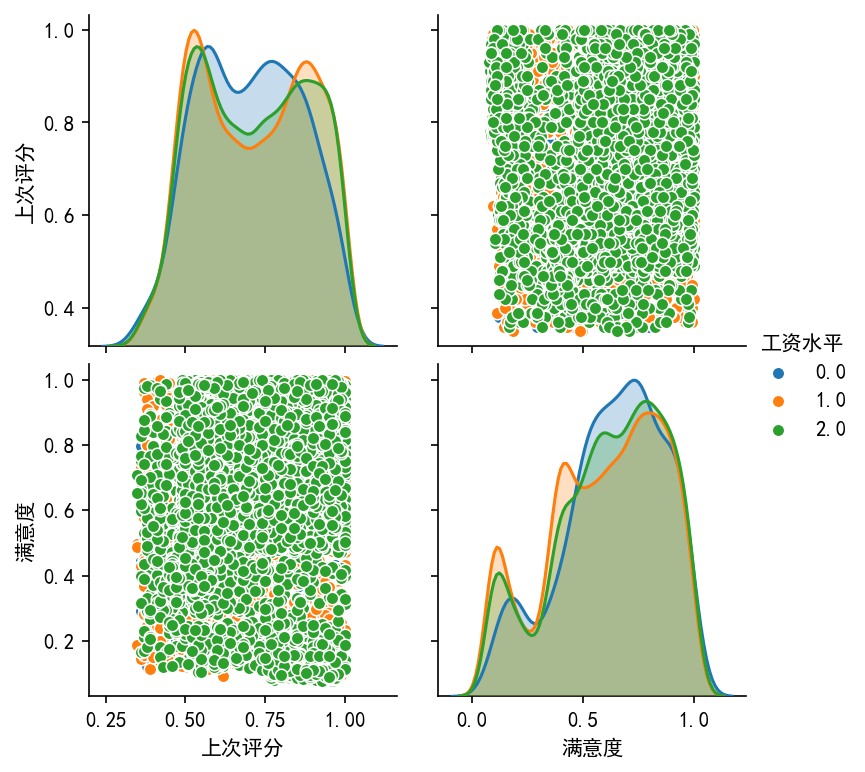

In [28]:
sns.pairplot(data[['上次评分','满意度','工资水平']],hue='工资水平')

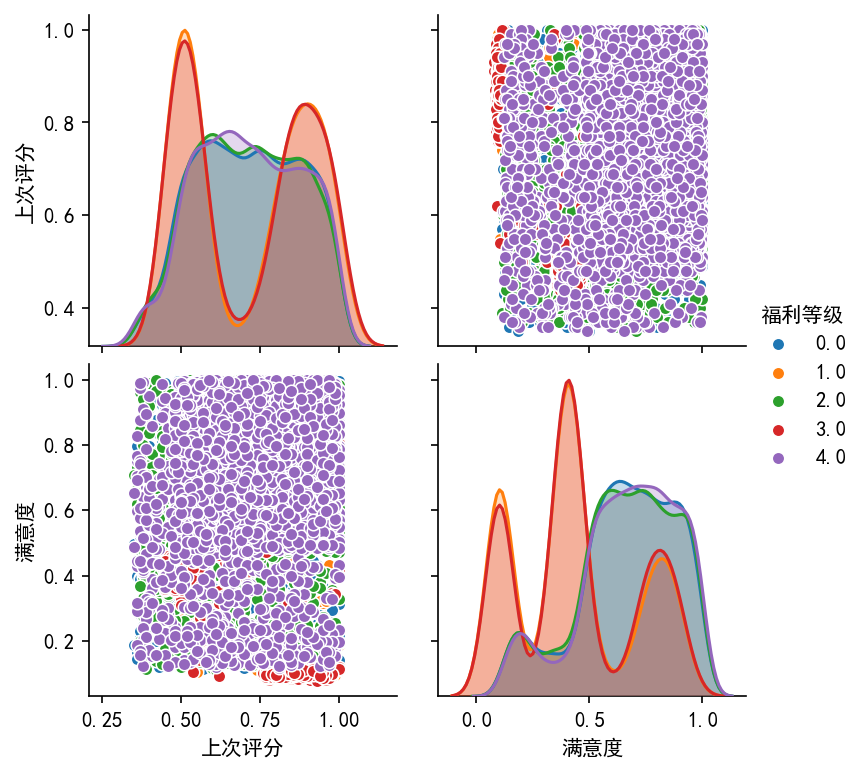

In [29]:
sns.pairplot(data[['上次评分','满意度','福利等级']],hue='福利等级')

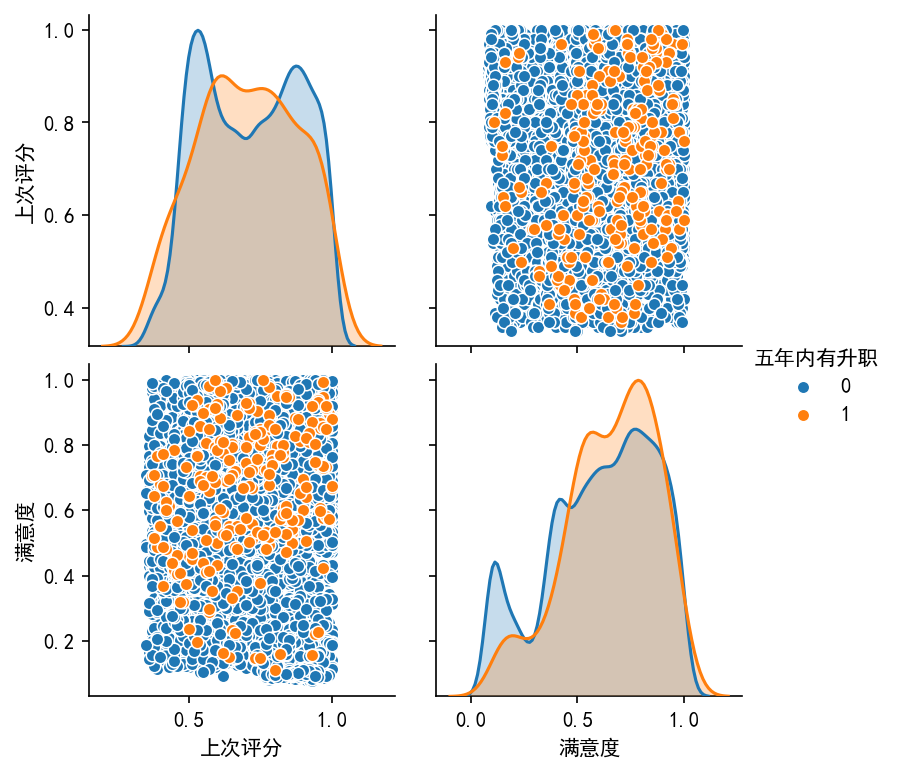

In [30]:

sns.pairplot(data[['上次评分','满意度','五年内有升职']],hue='五年内有升职')

In [132]:
obj1 = data.groupby('五年内有升职')['满意度']
obj1.describe()

,count,mean,std,min,25%,50%,75%,max
五年内有升职,,,,,,,,
0,11752.0,0.612923,0.249725,0.076,0.437,0.645,0.8170,1.0
1,247.0,0.658081,0.209522,0.110,0.527,0.688,0.8145,1.0
